In [33]:
import pandas as pd
import numpy as np
import os
import csv
import gzip
import sys
import datetime
import ast
import matplotlib.pyplot as plt
import scipy.stats as SSA
from scipy.stats import gaussian_kde

Glocery_and_Pharmacy
General_Retail
Art_and_Entertainment
Restaurant_and_Bar
Education
Healthcare


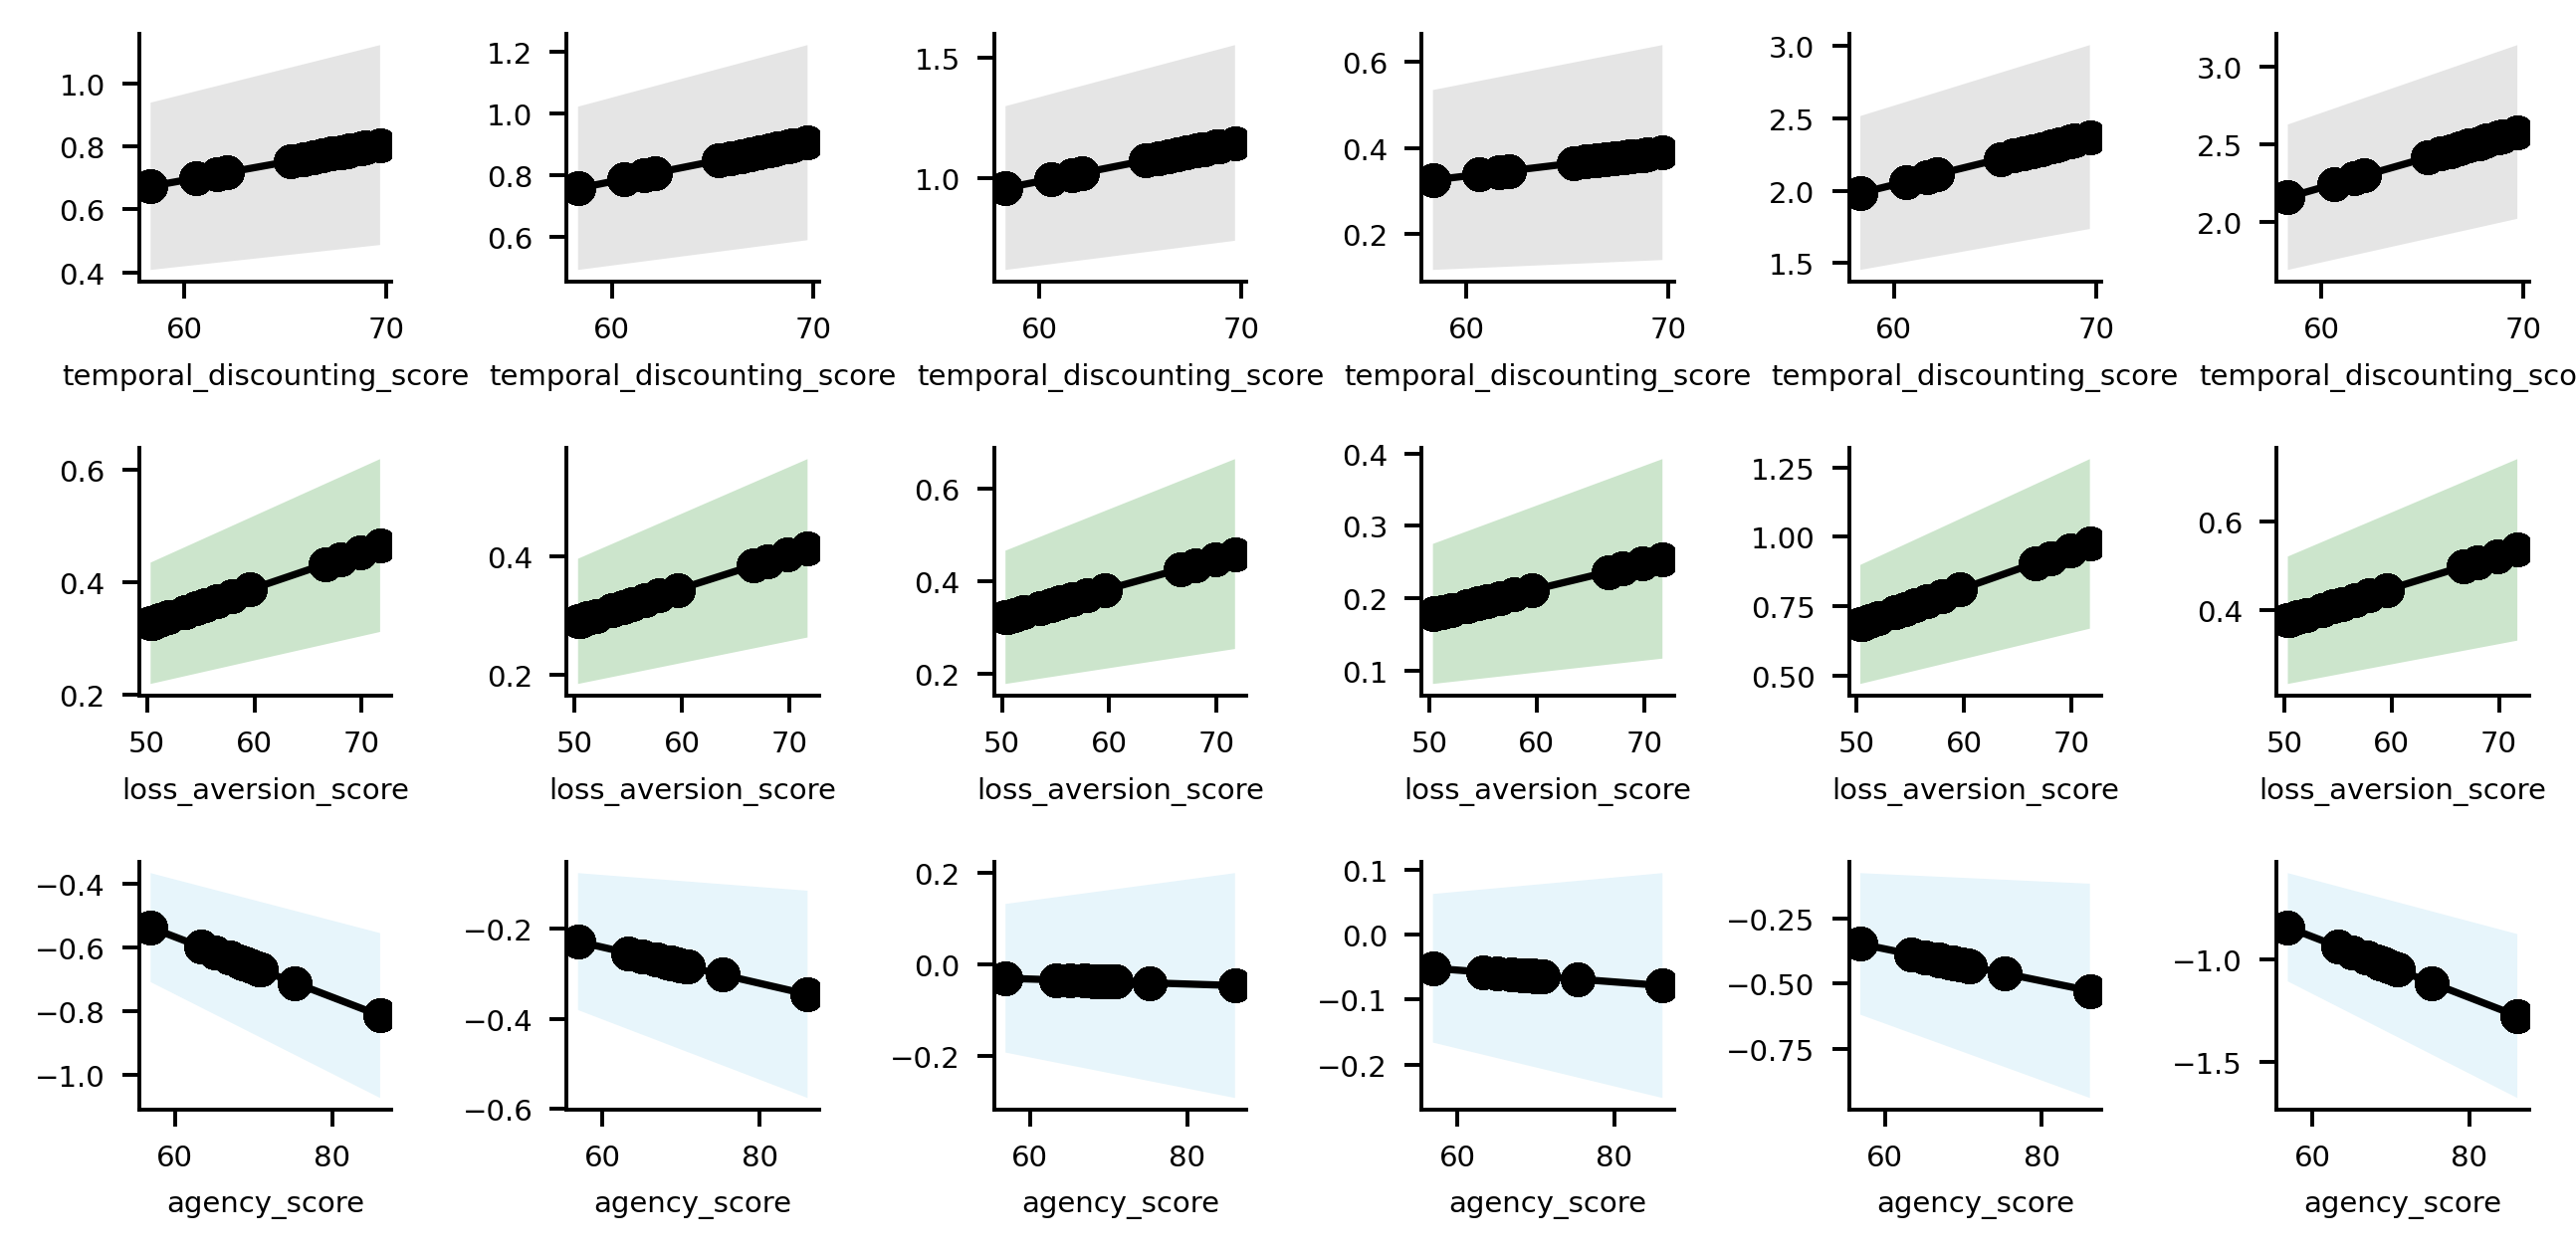

In [58]:
# linear_vars_ls = ["log_borough_case_count","temporal_discounting_score","loss_aversion_score",'agency_score', 
#                                  'stringency_index',"no_health_insurance_rate","no_vehicle_household_rate", "household_income", "percent_people_own_bachelor_degrees", 
#                                  "weighted_average_age"]
linear_vars_ls = ["temporal_discounting_score","loss_aversion_score",'agency_score']
depend_var_ls = ['Grocery_and_Pharmacy', 'General_Retail', 
                        'Art_and_Entertainment', 'Restaurant_and_Bar',
                        'Education', 'Healthcare']
color_dict = {"temporal_discounting_score":'grey',"loss_aversion_score":'green','agency_score':'skyblue'}

fig, axs = plt.subplots(3, 6, figsize=(7.5, 3.7), dpi=350)
plt.subplots_adjust(wspace=0.9)
for j in range(6):
    depend_var = depend_var_ls[j]
    print(depend_var)
    df_dependence = pd.read_csv('../results/gam_model_1to1/{}_linear_term_dependence.csv'.format(depend_var))
    df_dependence = df_dependence.dropna()
    df_dependence = df_dependence.drop_duplicates()
    
    for i in range(3):
        var = linear_vars_ls[i]
        # print(var)
        df_i = df_dependence[df_dependence['variable'] == var].copy()
        df_i = df_i.sort_values(by='x_original')
        axs[i,j].fill_between(df_i['x_original'],df_i['upper'],df_i['lower'], alpha=0.2, color=color_dict[var],edgecolor=None)
        axs[i,j].plot(df_i['x_original'], df_i['fit'], label = var,c='black')
        axs[i,j].scatter(df_i['x_original'], df_i['fit'], label = var,c='black')
        axs[i,j].set_xlabel(var, fontsize=6)
        axs[i,j].spines['top'].set_visible(False)
        axs[i,j].spines['right'].set_visible(False)
        # axs[i].spines['left'].set_linewidth(0.5)  # Left spine with thinner line
        # axs[i].spines['bottom'].set_linewidth(0.5) 
        axs[i,j].tick_params(axis='both', which='major', labelsize=6)

plt.tight_layout()
# plt.savefig('../results/gam_model_1to1/score_dependence.png',dpi=350, bbox_inches='tight')